# Unbiased Estimator

**Definition.** 
An estimate $ \hat{\boldsymbol{\alpha}}(\vec{\mathbf{y}}) $ for the single nonrandom parameter $\alpha$ is **unbiased** if $ E\{\hat{\boldsymbol{\alpha}}\} = \alpha $ for all $\alpha$. 

Much of the discussion of properties of an estimate $\hat{\boldsymbol{\alpha}}$ is based on the specialization of a single parameter rather than a vector, so that the notation is less complicated.


As an example of unbiased and biased estimates, consider the case of the sample mean and sample variance formed by $ m $ identically distributed random variables $ \mathbf{y}_i, \ i = 1, \ldots, m $. 

It is further assumed that the random variables are mutually uncorrelated and each has the same mean $\mu$ and the same variance $\sigma_{\mathbf{y}}^2$, i.e., $\mathbf{y}_i \sim \mathcal{N}(\mu, \sigma_{\mathbf{y}}^2)$.

The sample mean $\bar{\mathbf{y}}$ is given by

$$
\bar{\mathbf{y}} = \frac{1}{m} \sum_{i=1}^{m} \mathbf{y}_i
$$

We have $E \{\bar{\mathbf{y}}\} = \mu, \quad \forall \mu$, so the sample mean is an unbiased estimator.

### Proof that the Sample Mean $\bar{\mathbf{y}}$ is Unbiased

Given:
- $\mathbf{y}_i \sim \mathcal{N}(\mu, \sigma_{\mathbf{y}}^2)$, for $i = 1, \ldots, m$
- $\mathbf{y}_i$ are mutually uncorrelated, with mean $\mu$ and variance $\sigma_{\mathbf{y}}^2$

The sample mean is:

$$
\bar{\mathbf{y}} = \frac{1}{m} \sum_{i=1}^{m} \mathbf{y}_i.
$$

**Proof**

The expectation of $\bar{\mathbf{y}}$:

   $$
   E\{\bar{\mathbf{y}}\} = E\left\{\frac{1}{m} \sum_{i=1}^{m} \mathbf{y}_i\right\} = \frac{1}{m} \sum_{i=1}^{m} E\{\mathbf{y}_i\}.
   $$

Since $E\{\mathbf{y}_i\} = \mu$ for all $i$:

   $$
   E\{\bar{\mathbf{y}}\} = \frac{1}{m} \cdot m\mu = \mu.
   $$

Thus, we conclude that

$$
E\{\bar{\mathbf{y}}\} = \mu
$$

thus, $ \bar{\mathbf{y}}$ is an unbiased estimator of $\mu$.

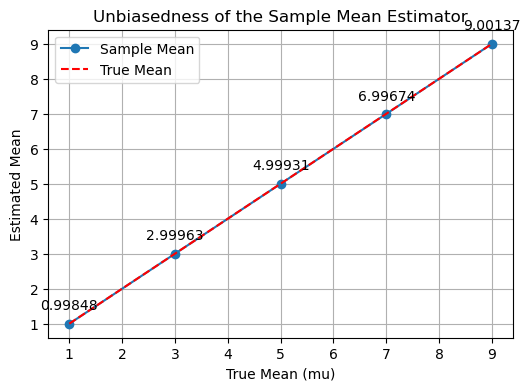

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
true_means = [1, 3, 5, 7, 9]  # Different true means (mu)
num_observations = 1000  # Number of observations (m)
variance = 1  # Unit variance
num_trials = 1000  # Number of trials to average the estimates

# Store the sample means for each true mean
sample_means = []

for true_mean in true_means:
    trial_means = []
    for _ in range(num_trials):
        # Generate m independent Gaussian random variables with mean `true_mean` and unit variance
        observations = np.random.normal(loc=true_mean, scale=np.sqrt(variance), size=num_observations)
        
        # Calculate the sample mean (estimator)
        sample_mean = (1 / num_observations) * np.sum(observations)
        trial_means.append(sample_mean)
    
    # Calculate the average of sample means over all trials
    average_sample_mean = np.mean(trial_means)
    sample_means.append(average_sample_mean)

# Plot the results
plt.figure(figsize=(6, 4))
plt.plot(true_means, sample_means, 'o-', label='Sample Mean')
plt.plot(true_means, true_means, 'r--', label='True Mean')
plt.xlabel('True Mean (mu)')
plt.ylabel('Estimated Mean')
plt.title('Unbiasedness of the Sample Mean Estimator')

# Add annotations to show the value of the sample mean at each point
for i, (true_mean, sample_mean) in enumerate(zip(true_means, sample_means)):
    plt.annotate(f'{sample_mean:.5f}', 
                 (true_mean, sample_mean), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')

plt.legend()
plt.grid(True)
plt.show()


### Biased Estimator

The sample variance $ \mathbf{s}_{\mathbf{y}}^2 $ is expressed as

$$
\mathbf{s}_{\mathbf{y}}^2 = \frac{1}{m} \sum_{i=1}^{m} (\mathbf{y}_i - \bar{\mathbf{y}})^2
$$

Since $E\{\mathbf{s}^2_{\mathbf{y}}\} \neq \sigma^2_{\mathbf{y}}$, the sample variance is a biased estimator to estimate the true variance $\sigma^2_{\mathbf{y}}$

#### Proof: The Bias of the Sample Variance

We prove that the sample variance $\mathbf{s}_{\mathbf{y}}^2$ is a biased estimator of the true variance $\sigma_{\mathbf{y}}^2$ by showing that:

$$
E\{\mathbf{s}_{\mathbf{y}}^2\} \neq \sigma_{\mathbf{y}}^2.
$$

**Definitions and Assumptions**

Given:
- $\mathbf{y}_i$, $i = 1, \ldots, m$, are independent and identically distributed random variables with $\mathbf{y}_i \sim \mathcal{N}(\mu, \sigma_{\mathbf{y}}^2)$.
- The sample mean is defined as:

  $$
  \bar{\mathbf{y}} = \frac{1}{m} \sum_{i=1}^{m} \mathbf{y}_i.
  $$

- The sample variance is defined as:

  $$
  \mathbf{s}_{\mathbf{y}}^2 = \frac{1}{m} \sum_{i=1}^{m} (\mathbf{y}_i - \bar{\mathbf{y}})^2.
  $$

**Expand the Expected Value of the Sample Variance**

We start by finding the expected value of $\mathbf{s}_{\mathbf{y}}^2$:

$$
E\{\mathbf{s}_{\mathbf{y}}^2\} = E\left\{\frac{1}{m} \sum_{i=1}^{m} (\mathbf{y}_i - \bar{\mathbf{y}})^2\right\} = \frac{1}{m} \sum_{i=1}^{m} E\left\{(\mathbf{y}_i - \bar{\mathbf{y}})^2\right\}.
$$

Next, expand the term inside the expectation:

$$
(\mathbf{y}_i - \bar{\mathbf{y}})^2 = \left[(\mathbf{y}_i - \mu) - (\bar{\mathbf{y}} - \mu)\right]^2.
$$

Using the identity $(a - b)^2 = a^2 - 2ab + b^2$, we have:

$$
(\mathbf{y}_i - \bar{\mathbf{y}})^2 = (\mathbf{y}_i - \mu)^2 - 2(\mathbf{y}_i - \mu)(\bar{\mathbf{y}} - \mu) + (\bar{\mathbf{y}} - \mu)^2.
$$

Taking the expectation of both sides:

$$
E\left\{(\mathbf{y}_i - \bar{\mathbf{y}})^2\right\} = E\left\{(\mathbf{y}_i - \mu)^2\right\} - 2E\left\{(\mathbf{y}_i - \mu)(\bar{\mathbf{y}} - \mu)\right\} + E\left\{(\bar{\mathbf{y}} - \mu)^2\right\}.
$$

**Evaluate Each Term Separately**

First Term: $E\left\{(\mathbf{y}_i - \mu)^2\right\}$

   Since $\mathbf{y}_i \sim \mathcal{N}(\mu, \sigma_{\mathbf{y}}^2)$, this term is simply the variance:

   $$
   E\left\{(\mathbf{y}_i - \mu)^2\right\} = \sigma_{\mathbf{y}}^2.
   $$

Second Term: $E\left\{(\mathbf{y}_i - \mu)(\bar{\mathbf{y}} - \mu)\right\}$

   The sample mean $\bar{\mathbf{y}}$ is given by:

   $$
   \bar{\mathbf{y}} = \frac{1}{m} \sum_{j=1}^{m} \mathbf{y}_j.
   $$

   Thus, the expectation becomes:

   $$
   E\left\{(\mathbf{y}_i - \mu)\left(\frac{1}{m} \sum_{j=1}^{m} (\mathbf{y}_j - \mu)\right)\right\}.
   $$

   Expanding and using the linearity of expectation:

   $$
   E\left\{(\mathbf{y}_i - \mu)(\bar{\mathbf{y}} - \mu)\right\} = \frac{1}{m} \sum_{j=1}^{m} E\left\{(\mathbf{y}_i - \mu)(\mathbf{y}_j - \mu)\right\}.
   $$

   We have 
   $$
   E\left\{(\mathbf{y}_i - \mu)(\bar{\mathbf{y}} - \mu)\right\} = 
   \begin{cases}
   0, & i \neq j, \\
   \frac{1}{m} \sigma_{\mathbf{y}}^2, & i = j.
   \end{cases}
   $$

   The second term then becomes:

   $$
   -2E\left\{(\mathbf{y}_i - \mu)(\bar{\mathbf{y}} - \mu)\right\} = -\frac{2}{m} \sigma_{\mathbf{y}}^2.
   $$

Third Term: $E\left\{(\bar{\mathbf{y}} - \mu)^2\right\}$

   Since $\bar{\mathbf{y}}$ is the mean of $m$ independent variables with variance $\sigma_{\mathbf{y}}^2$, we have:

   $$
   E\left\{(\bar{\mathbf{y}} - \mu)^2\right\} = \frac{\sigma_{\mathbf{y}}^2}{m}.
   $$

**Closed-form Expression of the Sample Variance**

Substituting the evaluated terms into the expectation:

$$
E\left\{(\mathbf{y}_i - \bar{\mathbf{y}})^2\right\} = \sigma_{\mathbf{y}}^2 - \frac{2\sigma_{\mathbf{y}}^2}{m} + \frac{\sigma_{\mathbf{y}}^2}{m}.
$$

Simplify the expression:

$$
E\left\{(\mathbf{y}_i - \bar{\mathbf{y}})^2\right\} = \sigma_{\mathbf{y}}^2 \left(1 - \frac{1}{m}\right).
$$

Thus:

$$
E\{\mathbf{s}_{\mathbf{y}}^2\} = \frac{1}{m} \sum_{i=1}^{m} E\left\{(\mathbf{y}_i - \bar{\mathbf{y}})^2\right\} = \frac{1}{m} \cdot m \left(\sigma_{\mathbf{y}}^2 \left(1 - \frac{1}{m}\right)\right).
$$

Simplifying further:

$$
E\{\mathbf{s}_{\mathbf{y}}^2\} = \left(\frac{m - 1}{m}\right) \sigma_{\mathbf{y}}^2.
$$

We have

$$
E\{\mathbf{s}_{\mathbf{y}}^2\} = \left(\frac{m - 1}{m}\right) \sigma_{\mathbf{y}}^2 \neq \sigma_{\mathbf{y}}^2.
$$

Since $E\{\mathbf{s}_{\mathbf{y}}^2\} \neq \sigma_{\mathbf{y}}^2$, the sample variance $\mathbf{s}_{\mathbf{y}}^2$ is a biased estimator of the true variance $\sigma_{\mathbf{y}}^2$.

#### Transform a Biased Estimate to an Unbiased Estimate

To obtain an unbiased estimate of the true variance $\sigma_{\mathbf{y}}^2$, we need to correct the bias in the sample variance $\mathbf{s}_{\mathbf{y}}^2$. 

As shown above, the expected value of the sample variance is:

$$
E\{\mathbf{s}_{\mathbf{y}}^2\} = \left(\frac{m - 1}{m}\right) \sigma_{\mathbf{y}}^2.
$$

Since $\mathbf{s}_{\mathbf{y}}^2$ is scaled down by a factor of $\frac{m - 1}{m}$, we can adjust it to obtain an unbiased estimator.

**Unbiased Estimator of the True Variance**

To remove the bias, multiply $\mathbf{s}_{\mathbf{y}}^2$ by $\frac{m}{m-1}$:

$$
\mathbf{s}_{\text{unbiased}}^2 = \frac{m}{m - 1} \mathbf{s}_{\mathbf{y}}^2.
$$

**Proof that $\mathbf{s}_{\text{unbiased}}^2$ is Unbiased**

Using the definition of $\mathbf{s}_{\mathbf{y}}^2$

   $$
   \mathbf{s}_{\text{unbiased}}^2 = \frac{m}{m - 1} \cdot \frac{1}{m} \sum_{i=1}^{m} (\mathbf{y}_i - \bar{\mathbf{y}})^2 = \frac{1}{m - 1} \sum_{i=1}^{m} (\mathbf{y}_i - \bar{\mathbf{y}})^2.
   $$

Using the previously derived expectation:

   $$
   E\{\mathbf{s}_{\text{unbiased}}^2\} = \frac{m}{m - 1} E\{\mathbf{s}_{\mathbf{y}}^2\} = \frac{m}{m - 1} \left(\frac{m - 1}{m}\right) \sigma_{\mathbf{y}}^2 = \sigma_{\mathbf{y}}^2.
   $$

Thus, we have

$$
E\{\mathbf{s}_{\text{unbiased}}^2\} = \sigma_{\mathbf{y}}^2, \quad \forall \sigma_{\mathbf{y}}^2
$$

Thus,

$$
\mathbf{s}_{\text{unbiased}}^2 = \frac{1}{m - 1} \sum_{i=1}^{m} (\mathbf{y}_i - \bar{\mathbf{y}})^2
$$

is an unbiased estimator of the true variance $\sigma_{\mathbf{y}}^2$. 

In [13]:
import numpy as np

# Parameters
mu = 10  # True mean
sigma_y = 50  # True standard deviation
m = 30  # Sample size
n_simulations = 10000  # Number of simulations

# Arrays to store variances
biased_variances = []
unbiased_variances = []

# Simulations
for _ in range(n_simulations):
    # Generate m samples from a normal distribution
    samples = np.random.normal(mu, sigma_y, m)
    
    # Calculate the biased sample variance (divide by m)
    biased_variance = np.sum((samples - np.mean(samples))**2) / m
    biased_variances.append(biased_variance)
    
    # Calculate the unbiased sample variance (divide by m-1)
    unbiased_variance = np.sum((samples - np.mean(samples))**2) / (m - 1)
    unbiased_variances.append(unbiased_variance)

# Calculate the mean of the variances from the simulations
mean_biased_variance = np.mean(biased_variances)
mean_unbiased_variance = np.mean(unbiased_variances)

mean_biased_variance, mean_unbiased_variance, sigma_y**2  # Display results

print(f'Mean of biased variance: {mean_biased_variance:.2f}')
print(f'Mean of unbiased variance: {mean_unbiased_variance:.2f}')  
print(f'True variance: {sigma_y**2:.2f}')

Mean of biased variance: 2407.10
Mean of unbiased variance: 2490.10
True variance: 2500.00


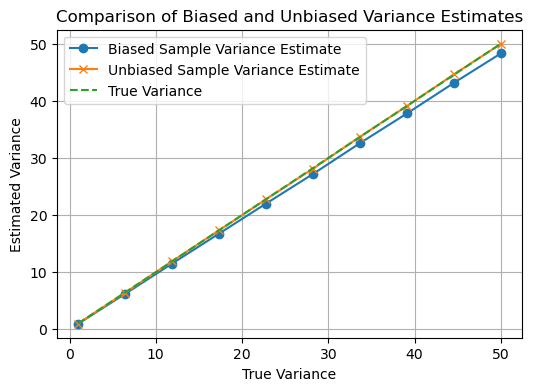

In [14]:
import matplotlib.pyplot as plt

# Different true variance values to test
true_variances = np.linspace(1, 50, 10)  # Test true variance from 1 to 50

# Arrays to store results
biased_means = []
unbiased_means = []

# Loop over different true variance values
for sigma_y in np.sqrt(true_variances):  # Use square root because we specified variances
    biased_variances = []
    unbiased_variances = []
    
    # Simulate for each true variance
    for _ in range(n_simulations):
        samples = np.random.normal(mu, sigma_y, m)
        biased_variance = np.sum((samples - np.mean(samples))**2) / m
        unbiased_variance = np.sum((samples - np.mean(samples))**2) / (m - 1)
        biased_variances.append(biased_variance)
        unbiased_variances.append(unbiased_variance)
    
    # Store the mean variances for each true variance
    biased_means.append(np.mean(biased_variances))
    unbiased_means.append(np.mean(unbiased_variances))

# Plotting the results
plt.figure(figsize=(6, 4))
plt.plot(true_variances, biased_means, label='Biased Sample Variance Estimate', marker='o')
plt.plot(true_variances, unbiased_means, label='Unbiased Sample Variance Estimate', marker='x')
plt.plot(true_variances, true_variances, label='True Variance', linestyle='--')
plt.xlabel('True Variance')
plt.ylabel('Estimated Variance')
plt.title('Comparison of Biased and Unbiased Variance Estimates')
plt.legend()
plt.grid(True)
plt.show()


### Asymptotically Unbiased Estimator

- An estimator $\hat{\boldsymbol{\alpha}}_m$ (random, boldface) represents a sequence of estimates of an unknown parameter $\alpha$ (fixed, nonboldface).
- The estimator $\hat{\alpha}_m$ is defined to be *asymptotically unbiased* if:

  $$
  \lim_{m \to \infty} E\{\hat{\boldsymbol{\alpha}}_m\} = \alpha.
  $$

This means that as the sample size $m$ increases indefinitely, the expected value of the estimator $\hat{\boldsymbol{\alpha}}_m$ converges to the true value of the parameter $\alpha$. 

The idea of asymptotic unbiasedness is crucial in statistics because it assures that an estimator, even if biased for small sample sizes, will provide increasingly accurate estimates as the sample size grows. 

This concept is often relevant in practical scenarios where large samples are obtainable, allowing such estimators to be reliable in the long run.

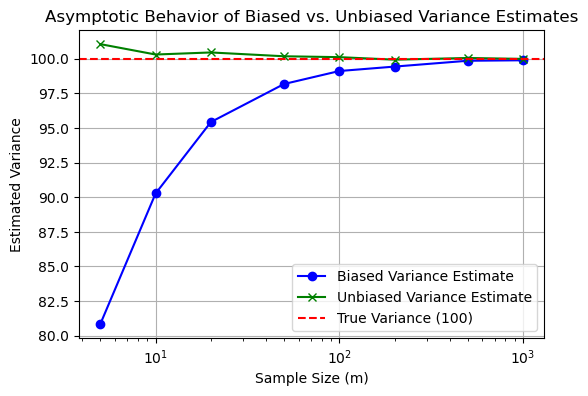

In [15]:
# Parameters
true_variance = 100  # Set true variance to 100
true_sigma = np.sqrt(true_variance)  # True standard deviation
sample_sizes = [5, 10, 20, 50, 100, 200, 500, 1000]  # Different sample sizes to test
n_simulations = 10000  # Number of simulations per sample size

# Arrays to store mean of variance estimates for each sample size
biased_means = []
unbiased_means = []

# Loop over different sample sizes
for m in sample_sizes:
    biased_variances = []
    unbiased_variances = []
    
    # Simulate for each sample size
    for _ in range(n_simulations):
        samples = np.random.normal(mu, true_sigma, m)
        # Calculate biased and unbiased variances
        biased_variance = np.sum((samples - np.mean(samples))**2) / m
        unbiased_variance = np.sum((samples - np.mean(samples))**2) / (m - 1)
        biased_variances.append(biased_variance)
        unbiased_variances.append(unbiased_variance)
    
    # Calculate mean estimates for current sample size
    biased_means.append(np.mean(biased_variances))
    unbiased_means.append(np.mean(unbiased_variances))

# Plotting the results
plt.figure(figsize=(6, 4))
plt.plot(sample_sizes, biased_means, label='Biased Variance Estimate', marker='o', color='blue')
plt.plot(sample_sizes, unbiased_means, label='Unbiased Variance Estimate', marker='x', color='green')
plt.axhline(true_variance, linestyle='--', label='True Variance (100)', color='red')
plt.xscale('log')
plt.xlabel('Sample Size (m)')
plt.ylabel('Estimated Variance')
plt.title('Asymptotic Behavior of Biased vs. Unbiased Variance Estimates')
plt.legend()
plt.grid(True)
plt.show()


### Summary: Unbiased Estimator for a Deterministic Parameter

**Deterministic Parameter**: A parameter $\alpha$ is considered deterministic if it has a fixed value, not subject to any randomness. 

For example, in the context of a normal distribution $\mathcal{N}(\mu, \sigma^2)$, $\mu$ and $\sigma^2$ are deterministic parameters.
  
**Unbiased Estimator**: An estimator $\hat{\alpha}(\vec{\mathbf{y}})$ is a function of the observed data $\vec{\mathbf{y}}$ used to estimate the parameter $\alpha$. 

The estimator $\hat{\alpha}(\vec{\mathbf{y}})$ is said to be unbiased if its expected value (mean) is equal to the true value of the parameter $\alpha$ for all possible values of $\alpha$.

Mathematically, this is expressed as:

$$
E[\hat{\alpha}(\vec{\mathbf{y}})] = \alpha, \quad \forall \alpha
$$

Here, $E[\hat{\alpha}(\vec{\mathbf{y}})]$ represents the expectation (average value) of the estimator $\hat{\alpha}(\vec{\mathbf{y}})$ over all possible samples $\vec{\mathbf{y}}$. 

If this condition holds, it means that the estimator does not systematically overestimate or underestimate the parameter $\alpha$; it is accurate "on average."

### Unbiased Estimator for Random Parameter(s)

#### Random Parameter Vector

Suppose $\vec{\hat{\boldsymbol{\alpha}}}$ is an estimate of the random parameter $\vec{\boldsymbol{\alpha}}$, where $\vec{\boldsymbol{\alpha}}$ itself is a random vector with mean $ E\{\vec{\boldsymbol{\alpha}}\} = \vec{\mu}_{\boldsymbol{\alpha}} $.

**Conditionally Unbiased Estimator**:

An estimator $\vec{\hat{\boldsymbol{\alpha}}}$ is said to be **conditionally unbiased** if the conditional mean of $\vec{\hat{\boldsymbol{\alpha}}}$ given vector $\vec{\alpha}$ equals the parameter vector $\vec{\alpha}$ itself, i.e.,

$$
E\{\vec{\hat{\boldsymbol{\alpha}}} \mid \vec{\alpha}\} = \vec{\alpha}, \quad \forall \vec{\alpha}
$$

**Unconditionally Unbiased Estimator**:

Assuming the density function $ p(\vec{\alpha}) $ is the known density function of the random parameter vector $\vec{\alpha}$:

To be unconditionally unbiased, the estimator $\vec{\hat{\boldsymbol{\alpha}}}$ must satisfy the condition:

$$
E\{ E\{ \vec{\hat{\boldsymbol{\alpha}}} \mid \vec{\boldsymbol{\alpha}} \} \} = E \{ \vec{\hat{\boldsymbol{\alpha}}} \} = E\{ \vec{\boldsymbol{\alpha}} \} = \vec{\mu}_{\boldsymbol{\alpha}}.
$$

where

$$
E\{ E\{ \vec{\hat{\boldsymbol{\alpha}}} \mid \vec{\boldsymbol{\alpha}} \} \} = \int_{-\infty}^{\infty
} E \{ \vec{\hat{\boldsymbol{\alpha}}} \mid \vec{\alpha} \} p(\vec{\alpha}) d\vec{\alpha}.
$$
     
This condition states that the overall expected value of the estimator equals the expected value of the parameter (vector), regardless of its randomness.

####  Single Random Parameter

The parameter to be estimated is itself a single random variable. 

For example, in Bayesian statistics, parameters are often treated as random variables with their own distributions.

**Conditionally Unbiased Estimator**

When the parameter $\boldsymbol{\alpha}$ is random, an estimator $\hat{\boldsymbol{\alpha}}(\vec{\mathbf{y}})$ is **conditionally unbiased** if the expectation of the estimator, given the true value of $\boldsymbol{\alpha} = \alpha$, is equal to that true value:

$$
E[\hat{\boldsymbol{\alpha}}(\vec{\mathbf{y}}) | \boldsymbol{\alpha} = \alpha] = \alpha, \quad \forall \alpha
$$

This means that if we knew the true value of the parameter $\alpha$, the estimator would, on average, yield that exact value. 

Conditional unbiasedness ensures that the estimator is accurate on average for each possible realization of the random parameter.

**Unbiased Estimator (in the random parameter context)**: 

An estimator $\hat{\boldsymbol{\alpha}}(\vec{\mathbf{y}})$ is **unbiased** in the context of a random parameter if its overall expectation equals the expected value of the parameter itself:

$$
E[\hat{\boldsymbol{\alpha}}(\vec{\mathbf{y}})] = E[\boldsymbol{\alpha}]
$$
  
Here, the expectation $E[\hat{\boldsymbol{\alpha}}(\vec{\mathbf{y}})]$ is taken over both the randomness in the data $\vec{\mathbf{y}}$ and any randomness in the parameter $\boldsymbol{\alpha}$. 

This condition implies that, when averaged over all possible values of both the data and the random parameter, the estimator $\hat{\boldsymbol{\alpha}}(\vec{\mathbf{y}})$ will equal the average (expected) value of the parameter $\boldsymbol{\alpha}$.

#### Example: The True Mean is a Random Variable

An example where the parameter of a distribution is random can be found in *Bayesian statistics*. 

In such scenarios, the parameter of a distribution itself, e.g., the true mean, is treated as a random variable with its own distribution, reflecting our uncertainty about its value. 

**Problem Setup**

Suppose we have a set of observations $ \mathbf{y}_1, \mathbf{y}_2, \ldots, \mathbf{y}_m $ that are normally distributed with an unknown mean $\mu$ and known variance $\sigma^2$. 

However, unlike the typical setup, we assume that the mean $\mu$ is not fixed but is instead a random variable itself, i.e., $\boldsymbol{\mu}$ (boldface).

**Random Parameter (Random True Mean)**  

Assume that the mean $\boldsymbol{\mu}$ is random and follows its own distribution, for example:

$$
\boldsymbol{\mu} \sim \mathcal{N}(\mu_0, \sigma_{\boldsymbol{\mu}}^2),
$$

where:
- $\mu_0$ is the prior mean (the mean of $\boldsymbol{\mu}$).
- $\sigma_{\boldsymbol{\mu}}^2$ is the prior variance, reflecting uncertainty about $\boldsymbol{\mu}$.

**Observations Given $\mu$ (nonboldface)**  

Given the random mean $\mu$ (nonboldface), the observations $ \mathbf{y}_i $ are conditionally distributed as:

$$
\mathbf{y}_i \mid \mu \sim \mathcal{N}(\mu_0, \sigma_{\boldsymbol{\mu}}^2), \quad i = 1, \ldots, n,
$$

where $\sigma_{\boldsymbol{\mu}}^2$ is known.

**Estimating the Random Parameter $\mu$**

Here, $\mu$ is the parameter of interest, but it is treated as a random variable with its own distribution. 

We want to estimate $\mu$ based on the observed data $ \mathbf{y}_1, \ldots, \mathbf{y}_m $.


**Conditional Expectation**

The expected value of each observation given the random parameter $\mu$ (nonboldface) is:

$$
E\{\mathbf{y}_i \mid \mu\} = \mu.
$$

This means that the observations are centered around the random mean $\boldsymbol{\mu}$, showing that they are conditionally unbiased estimators of $\boldsymbol{\mu}$.

**Unconditional Expectation**

To find the unconditional expectation of $ \mathbf{y}_i $, considering the randomness of $\boldsymbol{\mu}$, we use the law of total expectation:

$$
E\{\mathbf{y}_i\} = E\{E\{\mathbf{y}_i \mid \mu\}\} = E\{\boldsymbol{\mu}\} = \mu_0.
$$

This shows that the overall expectation of the observations reflects the prior mean $\mu_0$ of the random parameter $\boldsymbol{\mu}$.

